In [1]:
import pandas as pd
pd.options.display.max_columns = 100
import json, itertools
import time
import numpy as np
import matplotlib.pyplot as plt
import utils as ut

# Counting number of words per person per session

Importing a json file containing a map between active PersonNumber's and PersonIdCode's

In [2]:
with open('data/active_PersonNumber_PersonIdCode_map.json') as data_file:
    person_map = json.load(data_file)
    
active_ids = list(person_map.values())
active_ids.sort()
active_numbers = list(person_map.keys())
active_numbers.sort()

Importing info about the parliament members

In [3]:
mmbr = pd.read_csv('data/MemberCouncil.csv')
# the ppl DataFrame will be useful to map PersonNumber to PersonIdCode
ppl = pd.read_csv('data/Person.csv').dropna(axis=0, subset=['PersonNumber', 'PersonIdCode'])

Importing a cleaned version of the transcripts containing no NaN on either PersonNumber or Text

In [4]:
transc = pd.read_csv('data/transcript_clean.csv').drop('Unnamed: 0', axis=1)

Building the DataFrame that will store our calculations

In [5]:
# columns
cols = ['PersonIdCode']
cols.extend(transc.IdSession.unique().tolist())
df = pd.DataFrame(columns=cols)
df.PersonIdCode = active_ids
df.fillna(value=0, inplace=True)
df.set_index('PersonIdCode', inplace=True)

In [6]:
df.tail(2)

,4601,4602,4603,4604,4605,4606,4607,4608,4609,4610,4611,4612,4613,4614,4615,4616,4617,4618,4619,4620,4701,4702,4703,4704,4705,4706,4707,4708,4709,4710,4711,4712,4713,4714,4715,4716,4717,4718,4801,4802,4803,4804,4805,4806,4807,4808,4809,4810,4811,4812,4813,4814,4815,4816,4817,4818,4819,4820,4901,4902,4903,4904,4905,4906,4907,4908,4909,4910,4911,4912,4913,4914,4915,4916,4917,4918,4919,4920,49,5001,3,5002,59,5003,4,5004,5,5005
PersonIdCode,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3604,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
for row in transc.iterrows():
    row = row[1]
    #print(row['PersonNumber'])
    if str(row['PersonNumber']) in active_numbers:
        df.loc[int(str(person_map[str(row['PersonNumber'])])), row['IdSession']] += len(ut.to_text(row['Text']).split())

In [9]:
df.sort_index(inplace=True)

In [11]:
df

,4601,4602,4603,4604,4605,4606,4607,4608,4609,4610,4611,4612,4613,4614,4615,4616,4617,4618,4619,4620,4701,4702,4703,4704,4705,4706,4707,4708,4709,4710,4711,4712,4713,4714,4715,4716,4717,4718,4801,4802,4803,4804,4805,4806,4807,4808,4809,4810,4811,4812,4813,4814,4815,4816,4817,4818,4819,4820,4901,4902,4903,4904,4905,4906,4907,4908,4909,4910,4911,4912,4913,4914,4915,4916,4917,4918,4919,4920,49,5001,3,5002,59,5003,4,5004,5,5005
PersonIdCode,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1270,0,0,2104,3886,683,0,0,0,0,0,477,569,1988,770,0,358,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1812,0,3034,0,0,0,2643,0,1773
2061,0,0,1198,0,657,2177,0,1823,2409,563,5350,1437,0,1249,2072,779,365,1469,1354,2148,1018,5311,0,9003,5341,2691,4065,3645,6834,9558,8720,0,10854,8927,8371,7419,7728,13576,10318,5131,1045,5056,7873,13538,8994,0,8976,4074,5927,8268,7422,6466,6110,9306,7220,0,9134,5783,7068,3940,0,7686,5446,7631,9380,0,4335,6093,5006,7467,0,5949,4513,8547,7221,0,6952,5721,0,8631,0,3657,0,0,0,8792,0,8804
2129,1339,2888,1917,2155,1341,3109,0,585,1523,1592,599,2595,907,2863,3308,0,3267,0,5403,4071,4752,9620,5798,2458,10369,698,12419,6484,6179,0,5343,1506,8445,4946,3417,9673,2332,4374,4642,4491,0,2741,4427,7206,6491,4119,4615,0,8993,8086,6496,5989,8661,3086,5570,2563,6538,13813,5601,9810,5294,7763,10644,2646,7629,2406,6918,6773,5921,4783,2736,6972,6835,2429,5507,1447,9204,7778,0,4663,0,4325,0,1576,0,2854,0,5581
2143,997,1182,1613,2238,1914,2520,3705,436,3200,720,5654,643,3308,2053,1714,309,2257,747,0,1653,1466,3811,0,1509,1223,3517,2529,575,1345,832,689,1237,746,2170,735,4933,689,1375,2825,3828,0,1228,2245,2256,1498,0,1371,0,4430,3200,2164,1853,3598,1650,630,488,759,1658,0,4155,0,4148,4486,3098,7042,0,5981,4721,4376,7252,0,5825,6964,4881,3228,0,8899,11655,0,5070,0,4298,0,0,0,7489,0,4805
2147,3471,8369,5582,3919,3756,3490,0,6194,4626,519,4846,5401,0,5690,2474,4180,5605,0,3772,4523,3736,4660,0,2706,2214,5018,6873,3224,3354,3424,3935,0,2700,3629,2865,4463,3380,4976,1728,2026,1523,1197,3405,2638,5357,0,4693,586,3547,3175,5786,3739,2379,3642,4408,0,4489,3612,63,1677,610,1294,505,539,571,0,1965,850,458,120,507,0,109,661,585,337,79,789,0,1707,0,691,0,347,0,1964,0,41
2287,1292,1270,1468,0,0,0,441,264,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,857,0,237
2292,657,352,803,1419,87,0,0,1711,0,0,776,1679,0,305,21,1318,170,0,0,1059,371,208,0,409,1115,516,462,1055,809,1177,93,0,0,1669,0,0,1186,682,528,1612,0,647,2758,0,0,0,955,0,0,0,0,0,623,666,800,62,61,184,769,0,67,1560,644,303,0,0,706,48,699,934,665,468,577,51,1932,34,1330,536,0,1276,0,201,0,0,0,930,0,402
2310,0,0,0,0,0,0,0,0,676,591,0,1520,0,1357,0,357,985,0,0,1151,0,345,0,1187,1323,5504,639,0,0,1250,0,790,0,0,888,691,1018,2296,670,1569,0,2095,1144,234,8418,754,10050,0,7723,4090,5625,5112,14858,13230,9491,186,23446,18689,2324,3418,0,10765,5921,5737,8287,0,6880,16458,7961,8944,0,7061,5219,4560,17350,0,26191,9823,0,11633,0,25194,0,2263,0,22887,0,26175
2323,1749,236,1135,1252,0,612,0,2817,605,0,0,1023,687,0,0,0,196,0,610,94,529,1583,791,0,0,1678,0,504,256,0,2328,402,0,113,3883,1282,3194,2331,1360,1908,0,9092,685,250,1224,172,2908,0,3785,2297,2505,843,2839,2929,3357,1005,2317,1387,1502,2370,0,775,417,1227,1640,549,2652,3906,0,910,1599,4850,3568,0,0,624,2138,1984,0,4869,0,1056,0,0,0,2780,0,1328


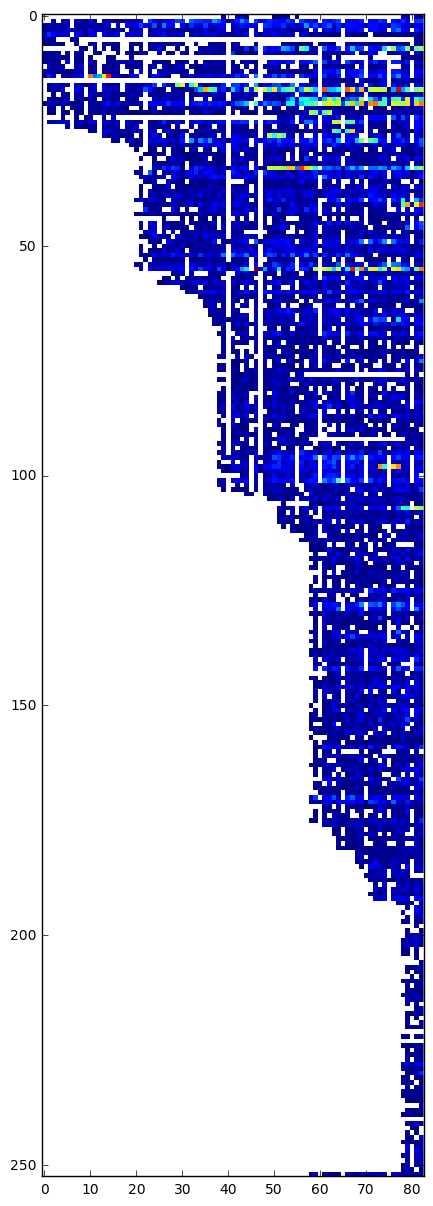

In [10]:
B = df.replace(0, np.nan).drop([49, 3, 4, 5, 59], axis=1)
fig, ax = plt.subplots(figsize=(15,15))
ax.imshow(B, interpolation="none")

plt.show()

Adding this to the people frame.

In [21]:
df = df.drop([49, 3, 4, 5, 59], axis=1)

In [32]:
df = df.drop('Sum', axis=1)

In [34]:
df['Sum'] = df.sum(axis=1)

In [35]:
df

,4601,4602,4603,4604,4605,4606,4607,4608,4609,4610,4611,4612,4613,4614,4615,4616,4617,4618,4619,4620,4701,4702,4703,4704,4705,4706,4707,4708,4709,4710,4711,4712,4713,4714,4715,4716,4717,4718,4801,4802,4803,4804,4805,4806,4807,4808,4809,4810,4811,4812,4813,4814,4815,4816,4817,4818,4819,4820,4901,4902,4903,4904,4905,4906,4907,4908,4909,4910,4911,4912,4913,4914,4915,4916,4917,4918,4919,4920,5001,5002,5003,5004,5005,Sum
PersonIdCode,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1270,0,0,2104,3886,683,0,0,0,0,0,477,569,1988,770,0,358,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1812,3034,0,2643,1773,21367
2061,0,0,1198,0,657,2177,0,1823,2409,563,5350,1437,0,1249,2072,779,365,1469,1354,2148,1018,5311,0,9003,5341,2691,4065,3645,6834,9558,8720,0,10854,8927,8371,7419,7728,13576,10318,5131,1045,5056,7873,13538,8994,0,8976,4074,5927,8268,7422,6466,6110,9306,7220,0,9134,5783,7068,3940,0,7686,5446,7631,9380,0,4335,6093,5006,7467,0,5949,4513,8547,7221,0,6952,5721,8631,3657,0,8792,8804,401591
2129,1339,2888,1917,2155,1341,3109,0,585,1523,1592,599,2595,907,2863,3308,0,3267,0,5403,4071,4752,9620,5798,2458,10369,698,12419,6484,6179,0,5343,1506,8445,4946,3417,9673,2332,4374,4642,4491,0,2741,4427,7206,6491,4119,4615,0,8993,8086,6496,5989,8661,3086,5570,2563,6538,13813,5601,9810,5294,7763,10644,2646,7629,2406,6918,6773,5921,4783,2736,6972,6835,2429,5507,1447,9204,7778,4663,4325,1576,2854,5581,384897
2143,997,1182,1613,2238,1914,2520,3705,436,3200,720,5654,643,3308,2053,1714,309,2257,747,0,1653,1466,3811,0,1509,1223,3517,2529,575,1345,832,689,1237,746,2170,735,4933,689,1375,2825,3828,0,1228,2245,2256,1498,0,1371,0,4430,3200,2164,1853,3598,1650,630,488,759,1658,0,4155,0,4148,4486,3098,7042,0,5981,4721,4376,7252,0,5825,6964,4881,3228,0,8899,11655,5070,4298,0,7489,4805,210298
2147,3471,8369,5582,3919,3756,3490,0,6194,4626,519,4846,5401,0,5690,2474,4180,5605,0,3772,4523,3736,4660,0,2706,2214,5018,6873,3224,3354,3424,3935,0,2700,3629,2865,4463,3380,4976,1728,2026,1523,1197,3405,2638,5357,0,4693,586,3547,3175,5786,3739,2379,3642,4408,0,4489,3612,63,1677,610,1294,505,539,571,0,1965,850,458,120,507,0,109,661,585,337,79,789,1707,691,347,1964,41,211973
2287,1292,1270,1468,0,0,0,441,264,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,857,237,5829
2292,657,352,803,1419,87,0,0,1711,0,0,776,1679,0,305,21,1318,170,0,0,1059,371,208,0,409,1115,516,462,1055,809,1177,93,0,0,1669,0,0,1186,682,528,1612,0,647,2758,0,0,0,955,0,0,0,0,0,623,666,800,62,61,184,769,0,67,1560,644,303,0,0,706,48,699,934,665,468,577,51,1932,34,1330,536,1276,201,0,930,402,43137
2310,0,0,0,0,0,0,0,0,676,591,0,1520,0,1357,0,357,985,0,0,1151,0,345,0,1187,1323,5504,639,0,0,1250,0,790,0,0,888,691,1018,2296,670,1569,0,2095,1144,234,8418,754,10050,0,7723,4090,5625,5112,14858,13230,9491,186,23446,18689,2324,3418,0,10765,5921,5737,8287,0,6880,16458,7961,8944,0,7061,5219,4560,17350,0,26191,9823,11633,25194,2263,22887,26175,385003
2323,1749,236,1135,1252,0,612,0,2817,605,0,0,1023,687,0,0,0,196,0,610,94,529,1583,791,0,0,1678,0,504,256,0,2328,402,0,113,3883,1282,3194,2331,1360,1908,0,9092,685,250,1224,172,2908,0,3785,2297,2505,843,2839,2929,3357,1005,2317,1387,1502,2370,0,775,417,1227,1640,549,2652,3906,0,910,1599,4850,3568,0,0,624,2138,1984,4869,1056,0,2780,1328,111497


In [36]:
ppl = pd.read_csv('data/people_jonas.csv').set_index('PersonIdCode')

In [37]:
False in (ppl.index == df.index)

False

In [38]:
ppl['TotalWords'] = df['Sum']

In [39]:
df.loc[3104, 'Sum'] == ppl.loc[3104, 'TotalWords']

True

In [40]:
ppl.to_csv('data/people_jonas.csv')